In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install six
!pip install numpy
!pip install slimit
!pip install psutil
!pip install fastBPE
!pip install javalang
!pip install submitit
!pip install dpu-utils
!pip install astunparse
!pip install stringcase
!pip install scikit-learn
!pip install torch
!pip install transformers
!pip install fairseq
!pip install tree_sitter
!pip install tensorboard
!pip install sentencepiece
!pip install tensorboardX
!pip install sacrebleu
!pip install simpletransformers
!pip install --upgrade gdown
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.6 MB/s eta 0:00:00
  Created wheel for slimit: filename=slimit-0.8.1-py3-none-any.whl size=79435 sha256=7239750535c12714dabf3a5a74b44553aa120d18fc589dbe107dab5523cd79bb
  Stored in directory: /root/.cache/pip/wheels/67/b4/c2/ebe388930097eb1456e91778daa41da8c461f88ce024db7aec
Successfully built slimit
  Preparing metadata (setup.py) ... done
  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp310-cp310-linux_x86_64.whl size=775291 sha256=685a03ef821434889cc9c0feb2e6b3313fb5b269243633d0165fce0afaa4c1d3
  Stored in directory: /root/.cache/pip/wheels/13/5d/b9/4b8897941ebc9e8c6cc3f3ffd3ea5115731754269205098754
Successfully built fastBPE
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
# general
import os
import json
import random
import warnings
from typing import List,Tuple

# ML
import numpy as np
import scipy as sp
import pandas as pd

# visual
import matplotlib
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from IPython.display import display

# DL
import torch
import torch.nn as nn

# HF
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from torchmetrics.text import BLEUScore, MatchErrorRate, CharErrorRate
from torchmetrics.text.rouge import ROUGEScore



import gzip
import json
import logging
import os
from pathlib import Path
from typing import Dict, List, Tuple

import numpy as np
import torch
from sklearn.metrics import f1_score
from tokenizers.implementations.byte_level_bpe import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.dataset import Dataset
from torch.utils.tensorboard.writer import SummaryWriter
from tqdm import tqdm, trange

from transformers import RobertaForSequenceClassification, RobertaTokenizer
from transformers.data.metrics import acc_and_f1, simple_accuracy

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# XLCoST

In [ ]:
# !gdown "14SEj8Q1oQaogQsaBn-9iTlMN334mW3d1&confirm=t"

In [ ]:
!gdown "1tZfsYQgWmc2gG340ru5VbrZ5aLIZ41_6&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1tZfsYQgWmc2gG340ru5VbrZ5aLIZ41_6&confirm=t
To: /content/XLCoST_data.zip
100% 298M/298M [00:06<00:00, 46.0MB/s]


In [ ]:
!unzip "/content/XLCoST_data.zip"

Archive:  /content/XLCoST_data.zip
   creating: XLCoST_data/
  inflating: __MACOSX/._XLCoST_data  
   creating: XLCoST_data/retrieval/
  inflating: __MACOSX/XLCoST_data/._retrieval  
   creating: XLCoST_data/generation/
  inflating: __MACOSX/XLCoST_data/._generation  
   creating: XLCoST_data/retrieval/nl2code_search/
  inflating: __MACOSX/XLCoST_data/retrieval/._nl2code_search  
   creating: XLCoST_data/retrieval/code2code_search/
  inflating: __MACOSX/XLCoST_data/retrieval/._code2code_search  
   creating: XLCoST_data/retrieval/.ipynb_checkpoints/
  inflating: __MACOSX/XLCoST_data/retrieval/._.ipynb_checkpoints  
   creating: XLCoST_data/generation/pair_data_tok_full_desc_comment/
  inflating: __MACOSX/XLCoST_data/generation/._pair_data_tok_full_desc_comment  
   creating: XLCoST_data/generation/pair_data_tok_1_comment/
  inflating: __MACOSX/XLCoST_data/generation/._pair_data_tok_1_comment  
   creating: XLCoST_data/generation/pair_data_tok_full_desc/
  inflating: __MACOSX/XLCoST_dat

In [ ]:
!gdown "1a_JpJmlaaI7opFYpThZ45aiDtXcUET6A&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1a_JpJmlaaI7opFYpThZ45aiDtXcUET6A&confirm=t
To: /content/train-match-pairs-data-P-J-C#-C-JS.json
100% 151M/151M [00:03<00:00, 48.7MB/s]


In [ ]:
!gdown "1F3t1jx7oodsJgO0z9CWagUCc4-rZOMR2&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1F3t1jx7oodsJgO0z9CWagUCc4-rZOMR2&confirm=t
To: /content/val-match-pairs-data-P-J-C#-C-JS.json
100% 8.25M/8.25M [00:00<00:00, 271MB/s]


In [ ]:
!gdown "1_kjMMHSCRBFdmRJryKFmPTnCu9r4NaPa&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1_kjMMHSCRBFdmRJryKFmPTnCu9r4NaPa&confirm=t
To: /content/val-homogeneous-file-pairs-data-P-J-C#-C-JS.json
100% 8.25M/8.25M [00:00<00:00, 36.9MB/s]


In [ ]:
!gdown "1uQo7tYkazrYSv16pfDvnrp2-5sOavLwV&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1uQo7tYkazrYSv16pfDvnrp2-5sOavLwV&confirm=t
To: /content/train-homogeneous-file-pairs-data-P-J-C#-C-JS.json
100% 151M/151M [00:02<00:00, 56.9MB/s]


In [ ]:
!gdown "1L1WUBl6m-ce8xQBHTjutbIleDk3DtpE-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1L1WUBl6m-ce8xQBHTjutbIleDk3DtpE-&confirm=t
To: /content/DeepSCC-RoBERTa-model-full-mixed-lang-snips.pt
100% 500M/500M [00:05<00:00, 84.9MB/s]


In [ ]:
!gdown "1d_dUfziicRoSQVR9sSv7YYyytL2keJol&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1d_dUfziicRoSQVR9sSv7YYyytL2keJol&confirm=t
To: /content/python_classifier_model_end_train.pt
100% 334M/334M [00:06<00:00, 52.8MB/s]


In [ ]:
!gdown "1aqybKA-_hT8iZWq1N2YQWWbMrfzgZEEM&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1aqybKA-_hT8iZWq1N2YQWWbMrfzgZEEM&confirm=t
To: /content/merges.txt
100% 483k/483k [00:00<00:00, 145MB/s]


In [ ]:
!gdown "1XTz9dMBZFtWOlryqORfO69DCA0nwEmEA&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1XTz9dMBZFtWOlryqORfO69DCA0nwEmEA&confirm=t
To: /content/vocab.json
100% 994k/994k [00:00<00:00, 166MB/s]


# Shared code

## Datasets classes

In [ ]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class CodeSnipPairsDataset(Dataset):
    def __init__(self, snip_pairs):
      self.snip_pairs = snip_pairs

    def __len__(self):
        return len(self.snip_pairs)

    def __getitem__(self, idx):
        return self.snip_pairs[idx]

In [ ]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class CodePairsDataset(Dataset):
    def __init__(self, java_exmp, python_exmp):
      self.java_samples = []
      self.python_samples = []
      self.samples_idx = []
      for k in java_exmp.keys():
        self.java_samples.append(' '.join(java_exmp[k]))
        self.python_samples.append(' '.join(python_exmp[k]))
        self.samples_idx.append(k)

    def __len__(self):
        return len(self.samples_idx)

    def __getitem__(self, idx):
        java_code = self.java_samples[idx]
        python_code = self.python_samples[idx]
        exmp_id = self.samples_idx[idx]
        return exmp_id, java_code, python_code

In [ ]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class MatchCodePairsDataset(Dataset):
    def __init__(self, java_exmp, python_exmp):
      self.code_pairs = []
      rng = np.random.default_rng()
      for k in java_exmp.keys():
        match_pair = (java_exmp[k], python_exmp[k], 1)
        keys_to_sample = list(java_exmp.keys()).copy()
        keys_to_sample.remove(k)
        sample_key = rng.choice(keys_to_sample)
        mismatch_pair = (java_exmp[k], python_exmp[sample_key], 0)
        self.code_pairs.append(match_pair)
        self.code_pairs.append(mismatch_pair)

    def __len__(self):
      return len(self.code_pairs)

    def __getitem__(self, idx):
      java_code, python_code, label = self.code_pairs[idx]
      return java_code, python_code, label

In [ ]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class MatchCodeSnipPairsDataset(Dataset):
    def __init__(self, snip_pairs, create=True):
        if create:
          self.snip_pairs = []
          rng = np.random.default_rng()
          pair_idxs = [ i for i in range(len(snip_pairs))]
          for idx, pair in enumerate(snip_pairs):
            match_pair = (pair[0], pair[1], 1)
            keys_to_sample = pair_idxs.copy()
            keys_to_sample.remove(idx)
            sample_key = rng.choice(keys_to_sample)
            mismatch_pair = (pair[0], snip_pairs[sample_key][1], 0)
            self.snip_pairs.append(match_pair)
            self.snip_pairs.append(mismatch_pair)
        else:
            self.snip_pairs = snip_pairs

    def __len__(self):
      return len(self.snip_pairs)

    def __getitem__(self, idx):
      java_code, python_code, label = self.snip_pairs[idx]
      return java_code, python_code, label

## Read data functions

In [ ]:
def read_examples(map_filename, code_filename):
    """Read examples from filename."""
    examples={}
    with open(map_filename) as f1,open(code_filename) as f2:
            for line1,line2 in zip(f1,f2):
              exp_id = int(line1.strip().split('-')[0])
              if exp_id in examples.keys():
                examples[exp_id].append(line2.strip())
              else:
                examples[exp_id] = [line2.strip()]
    return examples

In [ ]:
def read_snip_examples(src_filename, trg_filename):
    """Read examples from filename."""
    examples=[]
    with open(src_filename) as f1,open(trg_filename) as f2:
            for line1,line2 in zip(f1,f2):
              examples.append((line1.strip(), line2.strip()))
    return examples

In [ ]:
def read_match_pairs_json(file_path):
  with open(file_path, "r") as f:
    match_pairs = json.load(f)
    match_pairs = [(i['code1'], i['code2'], i['label']) for i in match_pairs]

    return match_pairs

## Models

In [ ]:
import numpy as np
import time
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast


class BERT_Arch(nn.Module):
    def __init__(self, bert):
        super(BERT_Arch, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)

        # softmax activation function
        self.softmax = nn.LogSoftmax(dim = 1)

    # define the forward pass
    def forward(self, input, mask):
        # pass the inputs to the model
        _, cls_hs = self.bert(input, attention_mask = mask, return_dict=False)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)


        # apply softmax activation
        x = self.softmax(x)
        return x

# Translate code functions

### Python classifier

In [ ]:
CODEBERTA_PRETRAINED = "huggingface/CodeBERTa-small-v1"


# Set up tokenizer
# py_tokenizer = RobertaTokenizer.from_pretrained(CODEBERTA_PRETRAINED)
py_tokenizer = ByteLevelBPETokenizer("/content/vocab.json", "/content/merges.txt")
py_tokenizer._tokenizer.post_processor = BertProcessing(
    ("</s>", py_tokenizer.token_to_id("</s>")), ("<s>", py_tokenizer.token_to_id("<s>")),
)
py_tokenizer.enable_truncation(max_length=256)


py_model = RobertaForSequenceClassification.from_pretrained(CODEBERTA_PRETRAINED, num_labels=2)
py_model.load_state_dict(torch.load("/content/python_classifier_model_end_train.pt", map_location=device))
py_model = py_model.to(device)
py_model.eval()

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at huggingface/CodeBERTa-small-v1 and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(52000, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (

### Logic classifier

In [ ]:
import numpy as np
import torch
import pickle
import pandas as pd
import torch.nn as nn
from torch.nn import DataParallel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModel, AutoTokenizer
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

model_pretained_name = "NTUYG/DeepSCC-RoBERTa"
pt_model = AutoModel.from_pretrained(model_pretained_name)

logic_tokenizer = AutoTokenizer.from_pretrained(model_pretained_name)

for param in pt_model.parameters():
    param.requires_grad = False

logic_model = BERT_Arch(pt_model)
logic_model.load_state_dict(torch.load("/content/DeepSCC-RoBERTa-model-full-mixed-lang-snips.pt", map_location=device))
logic_model = logic_model.to(device)
logic_model.eval()


BERT_Arch(
  (bert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((7

### Data preperation functions

In [ ]:
def convert_snips_to_logic_features(examples, tokenizer, max_source_length=256, max_target_length=256):
    tokens = []
    masks = []
    cls_token = None
    sep_token = None
    if tokenizer.cls_token and tokenizer.sep_token:
        cls_token = tokenizer.cls_token
        sep_token = tokenizer.sep_token
    else:
        cls_token = tokenizer.bos_token
        sep_token = tokenizer.eos_token
    for example in examples:
        java_code, python_code = example

        source_tokens = tokenizer.tokenize(java_code)[:max_source_length-2]
        source_tokens =[cls_token]+source_tokens+[sep_token]
        source_ids =  tokenizer.convert_tokens_to_ids(source_tokens)
        source_mask = [1] * len(source_ids)
        padding_length = max_source_length - len(source_ids)
        source_ids+=[tokenizer.pad_token_id]*padding_length
        source_mask+=[0]*padding_length

        target_tokens = tokenizer.tokenize(python_code)[:max_target_length-2]
        target_tokens = [cls_token]+target_tokens+[sep_token]
        target_ids = tokenizer.convert_tokens_to_ids(target_tokens)
        target_mask = [1] * len(target_ids)
        padding_length = max_target_length - len(target_ids)
        target_ids+=[tokenizer.pad_token_id]*padding_length
        target_mask+=[0]*padding_length

        src_trg_tokens = source_ids + target_ids
        src_trg_mask = source_mask + target_mask

        tokens.append(torch.tensor(src_trg_tokens))
        masks.append(torch.tensor(src_trg_mask))


    return tokens, masks

In [ ]:
def convert_examples_to_features(examples, tokenizer, max_source_length=256, max_target_length=256, stage=None):
    features = []
    cls_token = None
    sep_token = None
    if tokenizer.cls_token and tokenizer.sep_token:
        cls_token = tokenizer.cls_token
        sep_token = tokenizer.sep_token
    else:
        cls_token = tokenizer.bos_token
        sep_token = tokenizer.eos_token
    for example_index, example in enumerate(examples):
        #source
        source, target = example
        source_tokens = tokenizer.tokenize(source)[:max_source_length-2]
        source_tokens =[cls_token]+source_tokens+[sep_token]
        source_ids =  tokenizer.convert_tokens_to_ids(source_tokens)
        source_mask = [1] * (len(source_tokens))
        padding_length = max_source_length - len(source_ids)
        source_ids+=[tokenizer.pad_token_id]*padding_length
        source_mask+=[0]*padding_length

        #target
        if stage=="test":
            target_tokens = tokenizer.tokenize("None")
        else:
            target_tokens = tokenizer.tokenize(target)[:max_target_length-2]
        target_tokens = [cls_token]+target_tokens+[sep_token]
        target_ids = tokenizer.convert_tokens_to_ids(target_tokens)
        target_mask = [1] *len(target_ids)
        padding_length = max_target_length - len(target_ids)
        target_ids+=[tokenizer.pad_token_id]*padding_length
        target_mask+=[0]*padding_length


        features.append(
            (
                 example_index,
                 torch.tensor(source_ids, dtype=torch.long).to(device),
                 torch.tensor(target_ids, dtype=torch.long).to(device),
                 torch.tensor(source_mask, dtype=torch.long).to(device),
                 torch.tensor(target_mask, dtype=torch.long).to(device)
            )
        )
    return features

### Translation model

In [ ]:
from transformers import T5Config, T5ForConditionalGeneration, T5Tokenizer, PLBartConfig, PLBartForConditionalGeneration, PLBartTokenizer

In [ ]:
trans_model_name = 'Salesforce/codet5-base'
# trans_model_name = 'uclanlp/plbart-python-en_XX'

In [ ]:
trans_model_chkp_path = "/content/drive/MyDrive/runi_nlp/nlp-project/models-eden/codet5-base-trans-80-1-1.pt"

In [ ]:
# trans_config = T5Config.from_pretrained(trans_model_name)
# trans_tokenizer = PLBartTokenizer.from_pretrained(trans_model_name)
# trans_model = PLBartForConditionalGeneration.from_pretrained(trans_model_name)
trans_tokenizer = RobertaTokenizer.from_pretrained(trans_model_name)
trans_model = T5ForConditionalGeneration.from_pretrained(trans_model_name)
trans_model.load_state_dict(torch.load(trans_model_chkp_path, map_location=device))
trans_model = trans_model.to(device)

### Training functions

In [ ]:
import numpy as np
import time
import torch
from sklearn.metrics import accuracy_score
import os
from tqdm import tqdm

def train(epochs, examples, val_examples, trans_model, ispy_model, logic_model, trans_tok, ispy_tok, logic_tok, train_dataloader, cross_entropy, optimizer, val_dataloader, max_target_length, beam_size):
    train_losses = []
    valid_losses = []
    epoch_losses = {}
    # set initial loss to infinite
    best_valid_loss = float('inf')
    result_name = MODEL_FILE_PREFIX + ".txt"
    epoch_losses_file = MODEL_FILE_PREFIX + "-epoch_losses" + ".json"
    f = open(result_name, "w")
    f.close()
    # for each epoch
    for epoch in tqdm(range(epochs)):
        # train model
        train_loss, losses, preds = train_epoch(examples, trans_model, ispy_model, logic_model, trans_tok, ispy_tok, logic_tok, train_dataloader, cross_entropy, optimizer, max_target_length, beam_size)
        epoch_losses[str(epoch)] = losses

        with open(MODEL_FILE_PREFIX+"-ep-train-preds-"+str(epoch)+".json", "w") as f:
            json.dump(preds, f)
            del preds

        # evaluate model
        valid_loss, acc_score, preds = evaluate(val_examples, val_dataloader, trans_model, ispy_model, logic_model, trans_tok, ispy_tok, logic_tok, cross_entropy, max_target_length, beam_size)
        with open(MODEL_FILE_PREFIX+"-ep-eval-preds-"+str(epoch)+".json", "w") as f:
            json.dump(preds, f)
            del preds

        # save the best model
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(trans_model.state_dict(), MODEL_FILE_PREFIX+".pt")

        # append training and validation loss
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

#         print(f"Epoch: {epoch}, Loss: {train_loss}, Val accuracy: {acc_score}, Val loss: {valid_loss}")
        print(f'\nTraining Loss: {train_loss:.3f}')
        print(f'Validation Loss: {valid_loss:.3f}')
        print(f'Accuracy: {acc_score:.3f}')
        with open(result_name, "a") as f:
            f.writelines(f'{train_loss:.3f} {valid_loss:.3f} {acc_score:.3f}')
            f.writelines("\n")

        with open(epoch_losses_file, "w") as f:
            json.dump(epoch_losses, f)

    return train_losses, valid_losses


def train_epoch(examples, trans_model, ispy_model, logic_model, trans_tok, ispy_tok, logic_tok, train_dataloader, cross_entropy, optimizer, max_target_length, beam_size):
    trans_model.train()
    ispy_model.eval()
    logic_model.eval()

    total_loss, total_accuracy = 0, 0
    losses = []
    total_preds = []

    # iterate over batches
    for step, batch in tqdm(enumerate(train_dataloader)):

        exmp_idxs,source_ids,target_ids,source_mask,target_mask = batch
        source_ids = source_ids.to(device)
        source_mask = source_mask.to(device)
        target_ids = target_ids.to(device)
        target_mask = target_mask.to(device)

        trans_model.zero_grad()
        optimizer.zero_grad()

        try:
            outputs = trans_model(input_ids=source_ids, attention_mask=source_mask,
                                  labels=target_ids, decoder_attention_mask=target_mask)
            trans_loss = outputs.loss
        except Exception as e:
            print(exmp_idxs)
            print(source_ids)
            print(target_ids)
            raise e

        preds = trans_model.generate(source_ids,
                                       attention_mask=source_mask,
                                       use_cache=True,
                                       num_beams=beam_size,
                                       early_stopping=False,
                                       max_length=max_target_length)
        pred_ids = list(preds.cpu().numpy())
        p = [trans_tok.decode(id, skip_special_tokens=True, clean_up_tokenization_spaces=False) for id in pred_ids]

        tok_pycode = pad_sequence([torch.tensor(ispy_tok.encode(i).ids) for i in p], batch_first=True, padding_value=1)
        tok_pycode = tok_pycode.to(device)
        is_python_logits = ispy_model(tok_pycode)[0]
        is_python_pred = torch.argmax(is_python_logits, dim=1)
        fake_model_py_logits = torch.ones(is_python_logits.size()).to(device)
        fake_model_py_logits[:,0] = 0
        py_loss = cross_entropy(fake_model_py_logits, is_python_pred)

        java_examp = [examples[i][0] for i in exmp_idxs]
        python_examp = [examples[i][1] for i in exmp_idxs]

        pairs = list(zip(java_examp,p))
        tok_pairs, pairs_masks = convert_snips_to_logic_features(pairs, logic_tok)
        tok_pairs = torch.stack(tok_pairs).to(device)
        pairs_masks = torch.stack(pairs_masks).to(device)

        logic_logits = logic_model(tok_pairs, pairs_masks)
        logic_preds = torch.argmax(logic_logits, dim=1)
        fake_model_logic_logits = torch.ones(logic_logits.size()).to(device)
        fake_model_logic_logits[:,0] = 0
        logic_loss = cross_entropy(fake_model_logic_logits, logic_preds)

        batch_loss = TRANS_LOSS_PRC*trans_loss + PY_LOSS_PRC*py_loss + LOGIC_LOSS_PRC*logic_loss
        curr_loss = batch_loss.item()

        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
            print(f"curr_loss: {curr_loss}")

        if step % 100 == 0 and not step == 0:
            total_preds.extend(zip(java_examp,python_examp,p))

        if step % 400 == 0 and not step == 0 and curr_loss < losses[-1]:
            print("Saving model...")
            torch.save(trans_model.state_dict(), MODEL_FILE_PREFIX+".pt")

        # backward pass to calculate the gradients
        batch_loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(trans_model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        total_loss += curr_loss
        losses.append(curr_loss)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

    return avg_loss, losses,  [{'java':p[0], 'python_t':p[1], 'python_p':p[2]} for p in total_preds]



# function for evaluating the model
def evaluate(examples, val_dataloader, trans_model, ispy_model, logic_model, trans_tok, ispy_tok, logic_tok, cross_entropy, max_target_length, beam_size):
    print("\nEvaluating...")

    # deactivate dropout layers
    trans_model.eval()
    ispy_model.eval()
    logic_model.eval()

    total_loss, total_accuracy = 0, 0
    acc_score = 0
    total_preds = []
    t0 = time.time()
    # iterate over batches
    for step, batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = time.time() - t0

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        exmp_idxs,source_ids,target_ids,source_mask,target_mask = batch
        source_ids = source_ids.to(device)
        source_mask = source_mask.to(device)
        target_ids = target_ids.to(device)
        target_mask = target_mask.to(device)


        # deactivate autograd
        with torch.no_grad():

            # model predictions
            outputs = trans_model(input_ids=source_ids, attention_mask=source_mask,
                                  labels=target_ids, decoder_attention_mask=target_mask)
            trans_loss = outputs.loss

            preds = trans_model.generate(source_ids,
                                           attention_mask=source_mask,
                                           use_cache=True,
                                           num_beams=beam_size,
                                           early_stopping=False,
                                           max_length=max_target_length)
            pred_ids = list(preds.cpu().numpy())
            p = [trans_tok.decode(id, skip_special_tokens=True, clean_up_tokenization_spaces=False) for id in pred_ids]

            tok_pycode = pad_sequence([torch.tensor(ispy_tok.encode(i).ids) for i in p], batch_first=True, padding_value=1)
            tok_pycode = tok_pycode.to(device)
            is_python_logits = ispy_model(tok_pycode)[0]
            is_python_pred = torch.argmax(is_python_logits, dim=1)
            fake_model_py_logits = torch.ones(is_python_logits.size()).to(device)
            fake_model_py_logits[:,0] = 0
            py_loss = cross_entropy(fake_model_py_logits, is_python_pred)

            java_examp = [examples[i][0] for i in exmp_idxs]
            python_examp = [examples[i][1] for i in exmp_idxs]
            total_preds.extend(zip(java_examp,python_examp,p))

            pairs = list(zip(java_examp,p))
            tok_pairs, pairs_masks = convert_snips_to_logic_features(pairs, logic_tok)
            tok_pairs = torch.stack(tok_pairs).to(device)
            pairs_masks = torch.stack(pairs_masks).to(device)

            logic_logits = logic_model(tok_pairs, pairs_masks)
            logic_preds = torch.argmax(logic_logits, dim=1)
            fake_model_logic_logits = torch.ones(logic_logits.size()).to(device)
            fake_model_logic_logits[:,0] = 0
            logic_loss = cross_entropy(fake_model_logic_logits, logic_preds)

            batch_loss = TRANS_LOSS_PRC*trans_loss + PY_LOSS_PRC*py_loss + LOGIC_LOSS_PRC*logic_loss

            curr_loss = batch_loss.item()
            total_loss += curr_loss

    # compute the validation loss of the epoch
    for pred in total_preds:
          if pred[1] == pred[2]:
                acc_score += 1
    avg_loss = total_loss / len(val_dataloader)
    acc_score = acc_score / len(examples)

    return avg_loss, acc_score, [{'java':p[0], 'python_t':p[1], 'python_p':p[2]} for p in total_preds]

### Prepare data

In [ ]:
train_java_code_exp = read_examples('/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Java-map.jsonl', '/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Java-Python-tok.java')
train_py_code_exp = read_examples('/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Python-map.jsonl', '/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Java-Python-tok.py')

val_java_code_exp = read_examples('/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Java-map.jsonl', '/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Java-Python-tok.java')
val_py_code_exp = read_examples('/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Python-map.jsonl', '/content/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Java-Python-tok.py')

In [ ]:
train_java_py_examples = []
for exmp_id in train_java_code_exp.keys():
  train_java_py_examples.append((' '.join(train_java_code_exp[exmp_id]), ' '.join(train_py_code_exp[exmp_id])))

train_snip_pairs_jp_dataset = CodeSnipPairsDataset(convert_examples_to_features(train_java_py_examples, trans_tokenizer))

val_java_py_examples = []
for exmp_id in val_java_code_exp.keys():
  val_java_py_examples.append((' '.join(val_java_code_exp[exmp_id]), ' '.join(val_py_code_exp[exmp_id])))

val_snip_pairs_jp_dataset = CodeSnipPairsDataset(convert_examples_to_features(val_java_py_examples, trans_tokenizer))

In [ ]:
train_sampler = RandomSampler(train_snip_pairs_jp_dataset)
train_dataloader = DataLoader(train_snip_pairs_jp_dataset, sampler = train_sampler, batch_size = 16)

val_sampler = RandomSampler(val_snip_pairs_jp_dataset)
val_dataloader = DataLoader(val_snip_pairs_jp_dataset, sampler = val_sampler, batch_size = 16)

### Traning parameters

In [ ]:
optimizer = torch.optim.AdamW(trans_model.parameters(), lr = 1e-5)

In [ ]:
cross_entropy = nn.CrossEntropyLoss()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.autograd.set_detect_anomaly(True)

In [ ]:
TRANS_LOSS_PRC = 0.8
PY_LOSS_PRC = 0.1
LOGIC_LOSS_PRC = 0.1
MODEL_FILE_PREFIX = "/content/drive/MyDrive/runi_nlp/nlp-project/models-eden/codet5-base-trans-functions-concat-80-10-10"

### Train

In [ ]:
train_losses, valid_losses = train(epochs=1,
                                    examples=train_java_py_examples,
                                    val_examples=val_java_py_examples,
                                    trans_model=trans_model,
                                    ispy_model=py_model,
                                    logic_model=logic_model,
                                    trans_tok=trans_tokenizer,
                                    ispy_tok=py_tokenizer,
                                    logic_tok=logic_tokenizer,
                                    train_dataloader=train_dataloader,
                                    cross_entropy=cross_entropy,
                                    optimizer=optimizer,
                                    val_dataloader=val_dataloader,
                                    max_target_length=256,
                                    beam_size=5)

  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
Token indices sequence length is longer than the specified maximum sequence length for this model (555 > 512). Running this sequence through the model will result in indexing errors

1it [00:13, 13.59s/it]
2it [00:24, 11.72s/it]
3it [00:34, 11.23s/it]
4it [00:45, 11.06s/it]
5it [00:56, 10.94s/it]
6it [01:07, 10.98s/it]
7it [01:17, 10.77s/it]
8it [01:28, 10.73s/it]
9it [01:39, 10.90s/it]
10it [01:50, 10.86s/it]
11it [02:01, 10.90s/it]
12it [02:12, 10.93s/it]
13it [02:23, 10.89s/it]
14it [02:34, 10.96s/it]
15it [02:45, 10.97s/it]
16it [02:56, 11.01s/it]
17it [03:07, 11.09s/it]
18it [03:18, 11.11s/it]
19it [03:29, 11.16s/it]
20it [03:41, 11.18s/it]
21it [03:52, 11.14s/it]
22it [04:03, 11.14s/it]
23it [04:14, 11.12s/it]
24it [04:25, 11.1

  Batch    50  of    572.
curr_loss: 0.3049285411834717



51it [09:22, 11.10s/it]
52it [09:33, 11.07s/it]
53it [09:44, 11.06s/it]
54it [09:55, 11.01s/it]
55it [10:06, 11.10s/it]
56it [10:17, 11.17s/it]
57it [10:29, 11.18s/it]
58it [10:40, 11.15s/it]
59it [10:51, 11.13s/it]
60it [11:02, 11.15s/it]
61it [11:13, 11.19s/it]
62it [11:24, 11.17s/it]
63it [11:35, 11.02s/it]
64it [11:46, 11.01s/it]
65it [11:57, 11.08s/it]
66it [12:09, 11.16s/it]
67it [12:19, 11.09s/it]
68it [12:31, 11.09s/it]
69it [12:42, 11.07s/it]
70it [12:53, 11.11s/it]
71it [13:04, 11.27s/it]
72it [13:16, 11.29s/it]
73it [13:27, 11.26s/it]
74it [13:38, 11.21s/it]
75it [13:49, 11.18s/it]
76it [14:00, 11.14s/it]
77it [14:11, 11.06s/it]
78it [14:22, 11.00s/it]
79it [14:33, 10.99s/it]
80it [14:44, 11.02s/it]
81it [14:55, 10.99s/it]
82it [15:06, 10.98s/it]
83it [15:17, 11.06s/it]
84it [15:28, 11.08s/it]
85it [15:39, 11.03s/it]
86it [15:50, 11.00s/it]
87it [16:01, 10.94s/it]
88it [16:12, 10.93s/it]
89it [16:23, 11.00s/it]
90it [16:34, 10.93s/it]
91it [16:44, 10.84s/it]
92it [16:55, 10

  Batch   100  of    572.
curr_loss: 0.24305251240730286



101it [18:34, 11.03s/it]
102it [18:46, 11.16s/it]
103it [18:57, 11.17s/it]
104it [19:08, 11.19s/it]
105it [19:19, 11.19s/it]
106it [19:30, 11.22s/it]
107it [19:41, 11.10s/it]
108it [19:52, 11.13s/it]
109it [20:04, 11.15s/it]
110it [20:15, 11.15s/it]
111it [20:26, 11.10s/it]
112it [20:37, 11.05s/it]
113it [20:48, 11.10s/it]
114it [20:59, 11.15s/it]
115it [21:10, 11.10s/it]
116it [21:22, 11.22s/it]
117it [21:33, 11.24s/it]
118it [21:44, 11.18s/it]
119it [21:55, 11.21s/it]
120it [22:06, 11.13s/it]
121it [22:17, 11.13s/it]
122it [22:28, 11.11s/it]
123it [22:40, 11.14s/it]
124it [22:51, 11.08s/it]
125it [23:02, 11.05s/it]
126it [23:13, 11.05s/it]
127it [23:24, 11.06s/it]
128it [23:35, 11.05s/it]
129it [23:46, 11.09s/it]
130it [23:57, 11.11s/it]
131it [24:08, 11.10s/it]
132it [24:19, 11.07s/it]
133it [24:30, 11.09s/it]
134it [24:42, 11.15s/it]
135it [24:53, 11.11s/it]
136it [25:04, 11.12s/it]
137it [25:15, 11.22s/it]
138it [25:26, 11.12s/it]
139it [25:38, 11.26s/it]
140it [25:49, 11.21s/it]

  Batch   150  of    572.
curr_loss: 0.28565502166748047



151it [27:50, 10.91s/it]
152it [28:01, 10.95s/it]
153it [28:12, 10.93s/it]
154it [28:23, 10.99s/it]
155it [28:34, 10.98s/it]
156it [28:45, 11.04s/it]
157it [28:56, 11.08s/it]
158it [29:07, 11.17s/it]
159it [29:18, 11.12s/it]
160it [29:29, 11.13s/it]
161it [29:41, 11.14s/it]
162it [29:52, 11.10s/it]
163it [30:03, 11.16s/it]
164it [30:14, 11.13s/it]
165it [30:25, 11.09s/it]
166it [30:36, 11.12s/it]
167it [30:47, 11.03s/it]
168it [30:58, 11.04s/it]
169it [31:09, 11.08s/it]
170it [31:20, 11.03s/it]
171it [31:31, 11.01s/it]
172it [31:42, 10.97s/it]
173it [31:53, 10.92s/it]
174it [32:04, 10.99s/it]
175it [32:15, 10.96s/it]
176it [32:26, 10.93s/it]
177it [32:37, 11.00s/it]
178it [32:48, 10.94s/it]
179it [32:59, 10.97s/it]
180it [33:10, 11.05s/it]
181it [33:21, 11.07s/it]
182it [33:32, 11.13s/it]
183it [33:44, 11.21s/it]
184it [33:55, 11.18s/it]
185it [34:06, 11.08s/it]
186it [34:17, 11.14s/it]
187it [34:28, 11.15s/it]
188it [34:39, 11.16s/it]
189it [34:50, 11.16s/it]
190it [35:01, 11.07s/it]

  Batch   200  of    572.
curr_loss: 0.2419031709432602



201it [37:04, 11.26s/it]
202it [37:15, 11.25s/it]
203it [37:27, 11.32s/it]
204it [37:38, 11.25s/it]
205it [37:49, 11.15s/it]
206it [38:00, 11.16s/it]
207it [38:11, 11.15s/it]
208it [38:22, 11.10s/it]
209it [38:33, 11.17s/it]
210it [38:44, 11.13s/it]
211it [38:56, 11.16s/it]
212it [39:07, 11.22s/it]
213it [39:18, 11.25s/it]
214it [39:29, 11.12s/it]
215it [39:40, 11.12s/it]
216it [39:52, 11.21s/it]
217it [40:03, 11.14s/it]
218it [40:14, 11.15s/it]
219it [40:25, 11.24s/it]
220it [40:36, 11.21s/it]
221it [40:47, 11.13s/it]
222it [40:59, 11.18s/it]
223it [41:10, 11.14s/it]
224it [41:21, 11.12s/it]
225it [41:32, 11.13s/it]
226it [41:43, 11.02s/it]
227it [41:54, 11.07s/it]
228it [42:05, 10.99s/it]
229it [42:16, 11.01s/it]
230it [42:27, 11.01s/it]
231it [42:38, 11.04s/it]
232it [42:49, 11.00s/it]
233it [43:00, 11.04s/it]
234it [43:11, 10.96s/it]
235it [43:22, 11.01s/it]
236it [43:33, 11.00s/it]
237it [43:44, 10.97s/it]
238it [43:55, 10.99s/it]
239it [44:06, 11.01s/it]
240it [44:17, 11.02s/it]

  Batch   250  of    572.
curr_loss: 0.26325005292892456



251it [46:18, 11.01s/it]
252it [46:29, 10.98s/it]
253it [46:39, 10.85s/it]
254it [46:50, 10.93s/it]
255it [47:01, 10.94s/it]
256it [47:12, 10.95s/it]
257it [47:23, 10.84s/it]
258it [47:33, 10.75s/it]
259it [47:45, 10.86s/it]
260it [47:56, 10.90s/it]
261it [48:07, 11.02s/it]
262it [48:18, 10.99s/it]
263it [48:29, 11.04s/it]
264it [48:40, 11.10s/it]
265it [48:51, 11.12s/it]
266it [49:02, 11.02s/it]
267it [49:13, 10.96s/it]
268it [49:24, 11.03s/it]
269it [49:35, 11.08s/it]
270it [49:47, 11.12s/it]
271it [49:58, 11.10s/it]
272it [50:08, 10.97s/it]
273it [50:19, 11.01s/it]
274it [50:30, 10.93s/it]
275it [50:41, 10.80s/it]
276it [50:52, 10.90s/it]
277it [51:03, 10.89s/it]
278it [51:13, 10.84s/it]
279it [51:24, 10.91s/it]
280it [51:35, 10.95s/it]
281it [51:46, 10.96s/it]
282it [51:57, 10.98s/it]
283it [52:08, 10.96s/it]
284it [52:19, 10.93s/it]
285it [52:30, 10.86s/it]
286it [52:41, 10.89s/it]
287it [52:52, 11.02s/it]
288it [53:03, 11.03s/it]
289it [53:14, 10.99s/it]
290it [53:25, 10.99s/it]

  Batch   300  of    572.
curr_loss: 0.23935222625732422



301it [55:25, 10.90s/it]
302it [55:36, 10.88s/it]
303it [55:47, 10.93s/it]
304it [55:58, 10.90s/it]
305it [56:09, 10.98s/it]
306it [56:20, 10.97s/it]
307it [56:31, 11.03s/it]
308it [56:42, 11.06s/it]
309it [56:53, 10.91s/it]
310it [57:04, 10.89s/it]
311it [57:15, 10.93s/it]
312it [57:25, 10.91s/it]
313it [57:36, 10.92s/it]
314it [57:47, 10.89s/it]
315it [57:58, 10.87s/it]
316it [58:09, 10.85s/it]
317it [58:20, 10.88s/it]
318it [58:31, 10.91s/it]
319it [58:42, 10.86s/it]
320it [58:53, 10.89s/it]
321it [59:03, 10.90s/it]
322it [59:14, 10.90s/it]
323it [59:25, 10.92s/it]
324it [59:36, 10.92s/it]
325it [59:47, 10.99s/it]
326it [59:59, 11.03s/it]
327it [1:00:09, 10.99s/it]
328it [1:00:20, 10.97s/it]
329it [1:00:31, 10.92s/it]
330it [1:00:42, 10.96s/it]
331it [1:00:53, 10.99s/it]
332it [1:01:04, 10.97s/it]
333it [1:01:15, 10.97s/it]
334it [1:01:26, 11.05s/it]
335it [1:01:37, 11.01s/it]
336it [1:01:48, 10.91s/it]
337it [1:01:59, 10.94s/it]
338it [1:02:10, 10.86s/it]
339it [1:02:21, 10.91s/it

  Batch   350  of    572.
curr_loss: 0.42405518889427185



351it [1:04:33, 11.08s/it]
352it [1:04:44, 11.09s/it]
353it [1:04:55, 11.02s/it]
354it [1:05:06, 10.98s/it]
355it [1:05:17, 10.98s/it]
356it [1:05:28, 10.95s/it]
357it [1:05:39, 11.00s/it]
358it [1:05:50, 11.01s/it]
359it [1:06:01, 10.94s/it]
360it [1:06:12, 10.97s/it]
361it [1:06:23, 11.02s/it]
362it [1:06:34, 10.97s/it]
363it [1:06:44, 10.91s/it]
364it [1:06:56, 10.97s/it]
365it [1:07:07, 10.99s/it]
366it [1:07:17, 10.98s/it]
367it [1:07:29, 10.99s/it]
368it [1:07:39, 10.96s/it]
369it [1:07:51, 11.13s/it]
370it [1:08:02, 11.03s/it]
371it [1:08:13, 11.00s/it]
372it [1:08:24, 10.98s/it]
373it [1:08:35, 10.99s/it]
374it [1:08:46, 11.02s/it]
375it [1:08:57, 11.00s/it]
376it [1:09:08, 10.99s/it]
377it [1:09:19, 11.03s/it]
378it [1:09:30, 10.99s/it]
379it [1:09:41, 11.00s/it]
380it [1:09:51, 10.94s/it]
381it [1:10:02, 10.95s/it]
382it [1:10:13, 10.91s/it]
383it [1:10:24, 10.98s/it]
384it [1:10:35, 11.00s/it]
385it [1:10:46, 10.93s/it]
386it [1:10:57, 10.90s/it]
387it [1:11:08, 10.85s/it]


  Batch   400  of    572.
curr_loss: 0.2631816565990448



401it [1:13:41, 10.85s/it]
402it [1:13:52, 10.91s/it]
403it [1:14:04, 11.02s/it]
404it [1:14:15, 11.00s/it]
405it [1:14:26, 10.99s/it]
406it [1:14:37, 10.96s/it]
407it [1:14:47, 10.89s/it]
408it [1:14:58, 10.90s/it]
409it [1:15:09, 10.86s/it]
410it [1:15:20, 10.86s/it]
411it [1:15:31, 10.92s/it]
412it [1:15:42, 10.92s/it]
413it [1:15:53, 10.97s/it]
414it [1:16:04, 10.92s/it]
415it [1:16:15, 10.94s/it]
416it [1:16:25, 10.87s/it]
417it [1:16:36, 10.86s/it]
418it [1:16:47, 10.88s/it]
419it [1:16:58, 10.90s/it]
420it [1:17:09, 10.94s/it]
421it [1:17:20, 10.82s/it]
422it [1:17:31, 10.90s/it]
423it [1:17:42, 10.88s/it]
424it [1:17:53, 10.94s/it]
425it [1:18:04, 10.98s/it]
426it [1:18:15, 10.93s/it]
427it [1:18:25, 10.90s/it]
428it [1:18:37, 10.98s/it]
429it [1:18:48, 11.00s/it]
430it [1:18:59, 11.01s/it]
431it [1:19:09, 10.93s/it]
432it [1:19:20, 10.97s/it]
433it [1:19:31, 10.96s/it]
434it [1:19:42, 10.91s/it]
435it [1:19:53, 10.99s/it]
436it [1:20:04, 11.00s/it]
437it [1:20:15, 11.03s/it]


  Batch   450  of    572.
curr_loss: 0.2720162868499756



451it [1:22:48, 10.98s/it]
452it [1:22:59, 11.00s/it]
453it [1:23:10, 10.99s/it]
454it [1:23:21, 11.05s/it]
455it [1:23:32, 11.07s/it]
456it [1:23:43, 10.99s/it]
457it [1:23:54, 10.96s/it]
458it [1:24:05, 10.92s/it]
459it [1:24:16, 10.94s/it]
460it [1:24:27, 10.99s/it]
461it [1:24:38, 10.99s/it]
462it [1:24:49, 10.97s/it]
463it [1:25:00, 10.94s/it]
464it [1:25:11, 10.88s/it]
465it [1:25:22, 10.97s/it]
466it [1:25:33, 11.00s/it]
467it [1:25:44, 11.02s/it]
468it [1:25:55, 11.08s/it]
469it [1:26:06, 11.02s/it]
470it [1:26:17, 10.94s/it]
471it [1:26:27, 10.88s/it]
472it [1:26:38, 10.91s/it]
473it [1:26:49, 10.94s/it]
474it [1:27:00, 10.97s/it]
475it [1:27:11, 10.94s/it]
476it [1:27:22, 10.95s/it]
477it [1:27:33, 10.95s/it]
478it [1:27:44, 10.88s/it]
479it [1:27:55, 10.90s/it]
480it [1:28:06, 10.92s/it]
481it [1:28:17, 11.04s/it]
482it [1:28:28, 11.09s/it]
483it [1:28:39, 11.06s/it]
484it [1:28:50, 11.06s/it]
485it [1:29:01, 11.01s/it]
486it [1:29:12, 10.99s/it]
487it [1:29:23, 10.95s/it]


  Batch   500  of    572.
curr_loss: 0.25340133905410767



501it [1:31:56, 10.98s/it]
502it [1:32:08, 11.03s/it]
503it [1:32:18, 11.02s/it]
504it [1:32:30, 11.03s/it]
505it [1:32:41, 11.00s/it]
506it [1:32:52, 11.02s/it]
507it [1:33:02, 10.88s/it]
508it [1:33:13, 10.88s/it]
509it [1:33:24, 10.84s/it]
510it [1:33:35, 10.91s/it]
511it [1:33:46, 10.92s/it]
512it [1:33:56, 10.85s/it]
513it [1:34:07, 10.89s/it]
514it [1:34:18, 10.91s/it]
515it [1:34:29, 10.94s/it]
516it [1:34:40, 10.89s/it]
517it [1:34:51, 10.97s/it]
518it [1:35:02, 10.90s/it]
519it [1:35:13, 10.98s/it]
520it [1:35:25, 11.08s/it]
521it [1:35:36, 11.13s/it]
522it [1:35:47, 11.07s/it]
523it [1:35:58, 11.01s/it]
524it [1:36:09, 11.00s/it]
525it [1:36:20, 10.98s/it]
526it [1:36:30, 10.95s/it]
527it [1:36:41, 10.95s/it]
528it [1:36:52, 10.98s/it]
529it [1:37:03, 10.99s/it]
530it [1:37:14, 11.02s/it]
531it [1:37:25, 10.98s/it]
532it [1:37:36, 11.02s/it]
533it [1:37:47, 10.92s/it]
534it [1:37:58, 11.01s/it]
535it [1:38:09, 11.01s/it]
536it [1:38:20, 10.97s/it]
537it [1:38:31, 10.93s/it]


  Batch   550  of    572.
curr_loss: 0.2818005084991455



551it [1:41:06, 11.17s/it]
552it [1:41:17, 11.07s/it]
553it [1:41:28, 11.07s/it]
554it [1:41:39, 11.02s/it]
555it [1:41:50, 11.04s/it]
556it [1:42:01, 11.03s/it]
557it [1:42:12, 11.09s/it]
558it [1:42:23, 11.13s/it]
559it [1:42:34, 11.10s/it]
560it [1:42:45, 11.15s/it]
561it [1:42:57, 11.20s/it]
562it [1:43:08, 11.09s/it]
563it [1:43:19, 11.04s/it]
564it [1:43:30, 11.06s/it]
565it [1:43:41, 11.05s/it]
566it [1:43:52, 10.99s/it]
567it [1:44:03, 11.14s/it]
568it [1:44:14, 11.10s/it]
569it [1:44:25, 11.09s/it]
570it [1:44:36, 11.10s/it]
571it [1:44:47, 10.96s/it]
572it [1:44:58, 11.01s/it]



Evaluating...

Training Loss: 0.266
Validation Loss: 0.221
Accuracy: 0.015


100%|██████████| 1/1 [1:49:44<00:00, 6585.00s/it]


TypeError: ignored

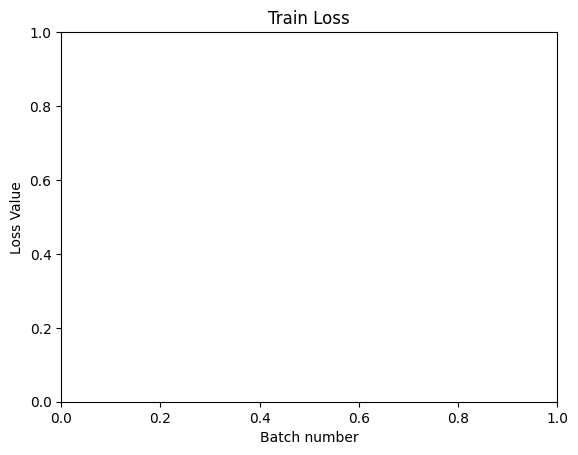

In [ ]:
plt.title("Train Loss")
plt.xlabel("Batch number")
plt.ylabel("Loss Value")
plt.plot(range(len(train_losses[0])), train_losses[0])
plt.show()

In [ ]:
!pip install codebleu
!pip install torchmetrics

from codebleu import calc_codebleu
from torchmetrics.text import BLEUScore, MatchErrorRate, CharErrorRate, TranslationEditRate, SacreBLEUScore
from torchmetrics.text.rouge import ROUGEScore
from torchmetrics import MetricCollection

with open(MODEL_FILE_PREFIX+"-ep-train-preds-0.json", "r") as f:
    train_preds = json.load(f)

with open(MODEL_FILE_PREFIX+"-ep-eval-preds-0.json", "r") as f:
    eval_preds = json.load(f)

def compute_metrics(preds):
    true_py = [p['python_t'] for p in preds]
    pred_py = [p['python_p'] for p in preds]

    bleu = BLEUScore()
    sbleu = SacreBLEUScore()
    ter = TranslationEditRate()

    rouge = ROUGEScore()
    mer = MatchErrorRate()
    cer = CharErrorRate()

    metrics_a = MetricCollection(bleu,sbleu,ter)
    metrics_b = MetricCollection(rouge,mer,cer)

    for p in preds:
        metrics_a.update([p['python_p']], [[p['python_t']]])
        metrics_b.update(p['python_p'], p['python_t'])

    metrics_a.plot(together=True)
    metrics_b.plot(together=True)

    return metrics_a.compute(), metrics_b.compute(), calc_codebleu(true_py,pred_py, lang="python", weights=(0.25, 0.25, 0.25, 0.25), tokenizer=None)

t_m_a, t_m_b, t_codebleu = compute_metrics(train_preds)
v_m_a, v_m_b, v_codebleu = compute_metrics(eval_preds)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.8 MB/s eta 0:00:00


In [ ]:
print(v_m_a)

In [ ]:
print(v_m_b)

In [ ]:
print(v_codebleu)